<a href="https://colab.research.google.com/github/Nahom32/MLP-Assignment/blob/main/ml_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Breast Cancer classification




In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


###File Reading

In [ ]:
data = pd.read_csv("/content/drive/My Drive/data.csv")

In [26]:
print(display(data.head()))
print("the above data is the head")
print(display(data.tail()))

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


None
the above data is the head


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


None


####matrix shape

In [ ]:
data.shape

(569, 33)

###An overall description of the breast cancer data


In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### Feature Engineering


In [ ]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
data.drop(columns=['Unnamed: 32'], inplace=True)

###Post-Processed Dataset


In [27]:
print(display(data.head()))

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


None


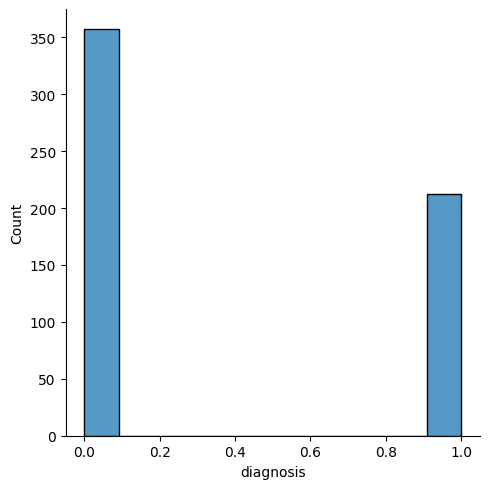

In [32]:
sns.displot(data['diagnosis'])


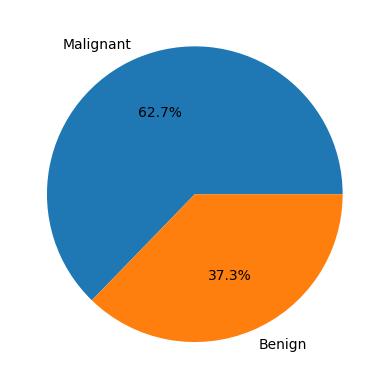

In [33]:
values_for_pie_chart = [data['diagnosis'].value_counts()[0], data['diagnosis'].value_counts()[1]]
plt.pie(values_for_pie_chart, labels=['Malignant', 'Benign'], autopct='%1.1f%%')
plt.show()

In [ ]:
target = data['diagnosis']
X = data.drop(columns=['diagnosis', 'id']) #This is the value of the target
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2,stratify=target, random_state=42)


In [23]:
model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('model', LogisticRegression(class_weight='balanced', random_state=45))

])
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)
print(y_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

120    0
250    1
375    0
99     1
455    0
      ..
381    0
534    0
448    0
205    1
75     1
Name: diagnosis, Length: 114, dtype: int64
[0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0
 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0
 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 1]
Accuracy: 0.9824561403508771


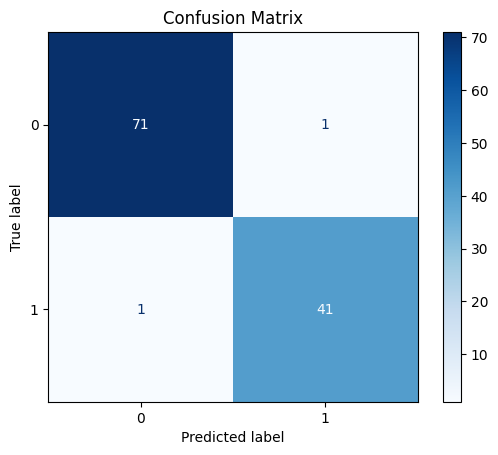

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred) ## This code represents the confusion matrix
ConfusionMatrixDisplay(conf_matrix, display_labels=model_pipeline.classes_).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

[2.61057552e-03 9.99999758e-01 4.83431336e-01 6.22674229e-01
 1.44768437e-01 2.24974983e-02 6.10066096e-01 6.83900736e-02
 3.45933596e-03 1.60184372e-02 9.91083779e-01 7.32742412e-04
 9.99973102e-01 1.02558281e-02 9.29474233e-02 4.96079259e-04
 3.01532381e-01 5.28843052e-03 1.74051846e-01 1.87732744e-03
 8.57911648e-04 1.83613469e-02 9.99993939e-01 9.90846057e-01
 7.26638182e-01 6.44191781e-04 4.82177771e-04 6.44757327e-01
 8.23080080e-01 9.99937473e-01 9.99923623e-01 4.99313542e-02
 9.98755403e-01 9.99310352e-01 7.30225522e-03 1.45893798e-01
 1.48238736e-02 3.72529948e-04 9.95140916e-01 2.78061510e-01
 1.65713423e-03 1.02362094e-02 5.83216971e-01 2.99347987e-03
 7.73438606e-02 8.27676583e-01 4.19932260e-02 9.12617695e-01
 7.56248148e-05 5.47730959e-03 9.99997028e-01 9.99832661e-01
 3.48251620e-02 1.96100933e-03 6.62485367e-03 9.74157721e-01
 7.11317009e-03 1.28385740e-05 1.96879147e-02 9.99999943e-01
 5.47765824e-02 5.73165596e-02 9.54921675e-01 2.50136380e-04
 2.89123544e-01 1.504447

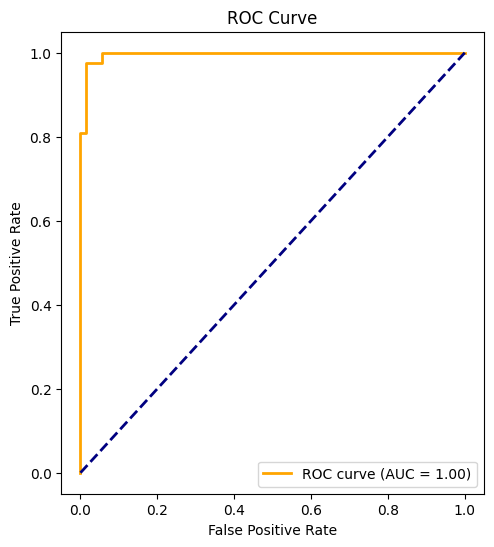

In [25]:
y_probability = model_pipeline.predict_proba(X_test)[:, 1]
print(y_probability)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probability)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 6))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

In [ ]:
import joblib
from google.colab import files
import pickle
with open('breast_model.pkl', 'wb') as file:
    pickle.dump(model_pipeline, file)
files.download('breast_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>